# Worker safety detection

This notebook contains an example of how to use worker safety detector models using AWS SDK

In [1]:
import boto3
import json

In [2]:
client = boto3.client('sagemaker-runtime', region_name='us-east-2')

Loading local jpeg image (content-type must be image/jpeg)

In [3]:
image_path = '../data/test.jpg'

In [4]:
with open(image_path, 'rb') as f:
    img_bytes = f.read()

Your endpoint name

In [5]:
endpoint_name = 'hardhat-detection'

Invoking sagemaker endpoint

In [6]:
res = client.invoke_endpoint(
        EndpointName=endpoint_name,
        ContentType='image/jpeg',
        Accept='application/json',
        Body=img_bytes)
data = json.load(res['Body'])

The result is a dictionary containing bouding boxes, classes and scores

In [7]:
data

{'classes': [1.0, 1.0],
 'scores': [0.8398328423500061, 0.8395887017250061],
 'boxes': [[0.3416098654270172,
   0.029050469398498535,
   0.6956197023391724,
   0.5498765707015991],
  [0.6229607462882996,
   0.0766458511352539,
   0.9800594449043274,
   0.6310074329376221]]}

An example of drawing the bounding box on the image using cv2

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread(image_path)

In [10]:
class_names = {
    0: 'no hardhat',
    1: 'hardhat'
}
def draw_outputs(img, data):
    boxes = data['boxes']
    objectness = data['scores']
    classes = data['classes']
    wh = np.flip(img.shape[0:2])
    colors = {
        0: (0, 0, 255),
        1: (0, 255, 0),
    }
    for i in range(len(boxes)):
        x1y1 = tuple((np.array(boxes[i][0:2]) * wh).astype(np.int32))
        x2y2 = tuple((np.array(boxes[i][2:4]) * wh).astype(np.int32))
        img = cv2.rectangle(img, x1y1, x2y2, colors[classes[i]], 2)
        img = cv2.putText(img, '{} {:.4f}'.format(
            class_names[int(classes[i])], objectness[i]),
            x1y1, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, colors[classes[i]], 2)
    return img

In [11]:
img = draw_outputs(img, data)

Using matplotlib to show the image inside notebook

In [12]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

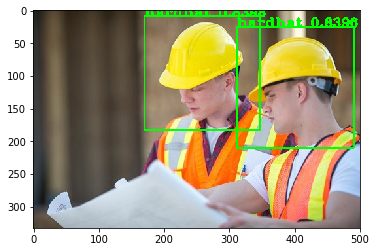

In [13]:
plt.imshow(rgb_img)